# Prepare the environments for this set of experiments

In [3]:
import sys
sys.path.append('../../')
from panav.environment.env import Room, MultiTunnelEnv, WareHouse
from panav.viz import draw_env

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


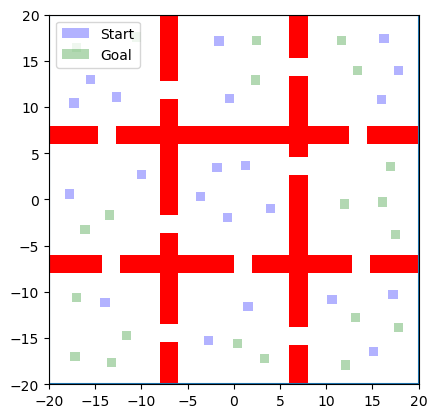

In [21]:
# Room Simplified

n_agents = list(range(1,30,10))
bloating_r = 0.5

env = Room(n_col = 3, n_row = 3, N_agent=max(n_agents),gap_width=3.9*bloating_r)
draw_env(env,obs_alpha=1.0)

env_name = 'Room'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env,f)

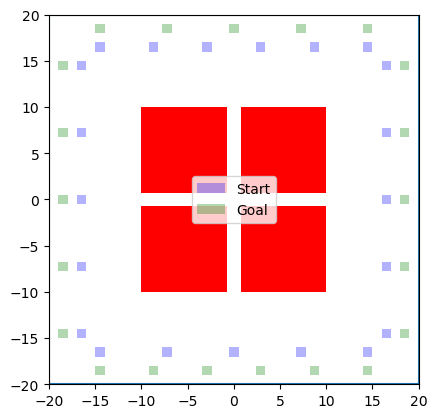

In [22]:
# Warehouse Simplified
n_agents = list(range(1,30,10))
limits = [(-20,20),(-20,20)]

env = WareHouse(limits = limits, N_agent = max(n_agents), shelf_region_x_limit=[-10,10], shelf_region_y_limit=[-10,10],n_col = 2, n_row = 2 , corner_padding_x=5,corner_padding_y=5)
draw_env(env,obs_alpha=1.0)


env_name = 'Warehouse'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env,f)

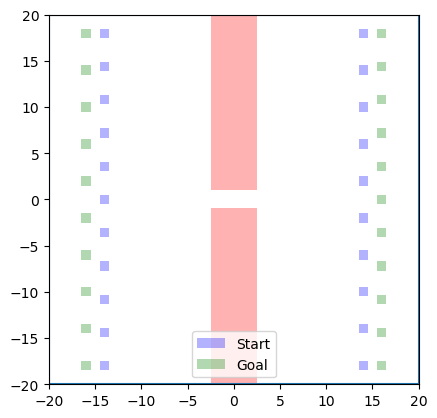

In [23]:
# Single Tunnel
bloating_r = 0.5

n_agents = list(range(1,30,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 1

env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = max(n_agents))
draw_env(env)


env_name = 'SingleTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env,f)

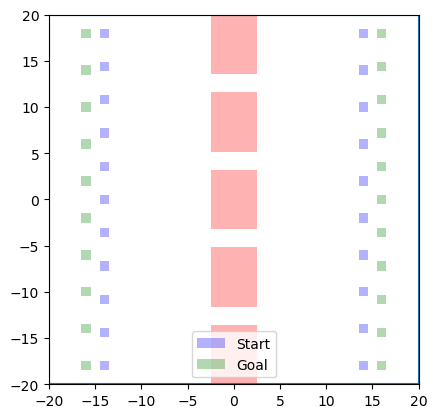

In [24]:
# Multi Tunnel
bloating_r = 0.5

n_agents = list(range(1,30,10))
limits = [(-20,20),(-20,20)]
n_tunnel = 4

env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = max(n_agents))
draw_env(env)

env_name = 'MultiTunnel'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env,f)

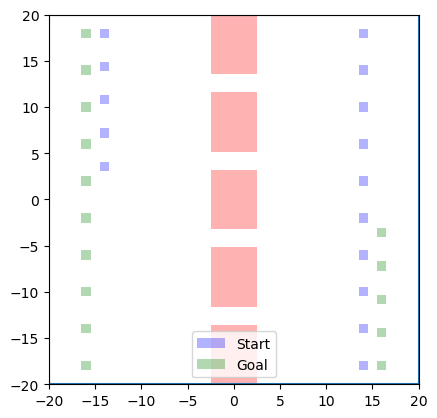

In [26]:
from copy import deepcopy
n_reduced = 15
env_in = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = max(n_agents))

env = deepcopy(env_in)

env.starts = env.starts[:n_reduced]
env.goals = env.goals[:n_reduced]
env.calc_start_goal_regions()

draw_env(env)